#                Square Panda Game Activity Exploratory Analysis

In [ ]:
import utils
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import tree, model_selection

df = pd.read_csv("DataTest1..csv", error_bad_lines=False)


### Cleaning the data: 
### 1) Filter the activities where the words played are not nonsense words.
### 2) Remove the activities which have Do Not Consider flag as 1

In [164]:
df.shape

(309625, 18)

In [165]:
df = df[df['nonsensewords']==0]

In [166]:
df = df[df['dnc']==0]

In [167]:
df.shape

(119189, 18)

### Note: We reduced the size of the data to half

## Let's calculate Age from the Date of Birth

### Age = (Current Year - Birth Year)
### Let's calculate Current Year and extract Birth Year from Dob 

In [168]:
now = dt.date.today().year

### Fill 'null' values with a placeholder to allow calculations 

In [169]:
df['dateofbirth'] = df.dateofbirth.replace('null','1/1/01 12:00 AM' )


In [170]:
df['duration'] = df['duration'].replace('null','0')
df['duration'] = df['duration'].astype(int)



In [171]:
df['gender'] = df.gender.replace('O','Not Known')
df['gender'] = df.gender.replace('null','Not Known')

### Convert dob to DateTime datatype to extract year from it

In [172]:
df['dateofbirth'] = pd.to_datetime(df['dateofbirth'] ,format='%m/%d/%y %H:%M AM',errors='coerce')

In [173]:
df['year']=df['dateofbirth'].dt.year

In [180]:
df['age'] = now - df['year']
df['age']

65541      9
65543      4
65545      5
65546     13
65550      6
65551      3
65552      4
65554      8
65556     10
65557      7
65559      3
65561      4
65563     10
65565     16
65566      6
65567      7
65568     41
65569      3
65570      5
65571      7
65572      5
65573     33
65574      6
65575      8
65576      5
65577      4
65579      9
65583      6
65586     11
65587      2
          ..
309522     5
309526     6
309540     4
309542     9
309543     5
309549     4
309550     6
309551     5
309552     3
309554    41
309558     5
309566     7
309568     5
309569    41
309570     0
309571     7
309576    11
309585    16
309589     4
309591     3
309594    16
309595     3
309597    16
309598     2
309600     6
309608     3
309610    16
309615     2
309619     3
309621     8
Name: age, Length: 118275, dtype: int64

### Remove age anamolies from data

In [178]:
df = df[df['age']>=0]
df.shape

(118275, 20)

# Grouping by various fields 

In [176]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')
df1 = df[df['createdat']
df1.cumsum().plot(x='createdat',y='age')

plt.show()

SyntaxError: invalid syntax (<ipython-input-176-df88c1694e53>, line 6)

## Let's see the distribution of activities by Games

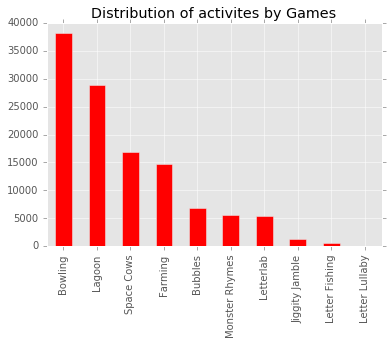

In [181]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','green','blue','orange','white','brown']
df['gamename'].value_counts().plot(kind='bar',stacked=True, title='Distribution of activites by Games',colors=['red'])
plt.show()

### This shows us that the maximum played game is   Bowling > Lagoon >  Space Cows> Farming 

## Distribution of activities per Age

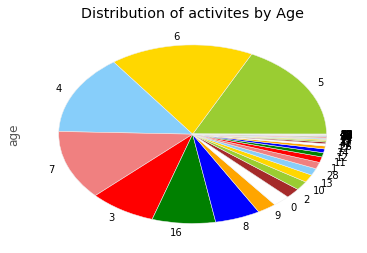

In [182]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','green','blue','orange','white','brown']
df['age'].value_counts().plot(kind='pie',title='Distribution of activites by Age',colors=colors)
plt.show()

### This shows that 50% of the age range of our players belong to is 4-6

## Distribution of type of Word (Word/Letter)

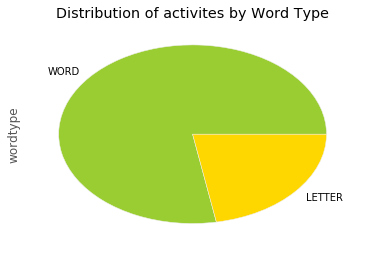

In [183]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','green','blue','orange','white','brown']
df['wordtype'].value_counts().plot(kind='pie',title='Distribution of activites by Word Type',colors=colors)
plt.show()

### This show that approximately more than 75% of activities played are for the wordtype as 'Word' and 25% as 'Letter'

## Distribution of Activities by Gender

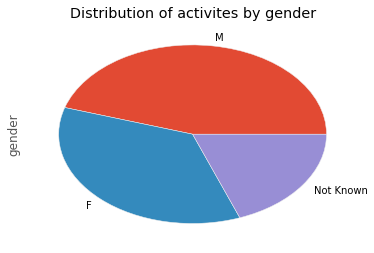

In [184]:
df['gender'].value_counts().plot(kind='pie',title='Distribution of activites by gender')
plt.show()

## Let's calculate average duration i.e. time for which each activity is carried out

In [185]:
Average_seconds = df['duration'].mean()
Avergae_minutes = df['duration'].mean()/60
print('Average Duration in seconds is:',Average_seconds)
print('Average Duration in minutes is:',Avergae_minutes)

('Average Duration in seconds is:', 556.61003593320652)
('Average Duration in minutes is:', 9.276833932220109)


### Hence the Average duration of each activity is 9.3827 minutes or 562.9675 seconds

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119189 entries, 65541 to 309621
Data columns (total 20 columns):
id               119189 non-null object
childid          119189 non-null float64
endtime          119189 non-null object
gamename         119189 non-null object
gamescore        119189 non-null object
nonsensewords    119189 non-null int64
starttime        119189 non-null object
userid           119189 non-null float64
word             119180 non-null object
wordtype         119189 non-null object
createdat        119189 non-null object
end_ms_time      119189 non-null object
start_ms_time    119189 non-null object
platform         119189 non-null object
dnc              119189 non-null object
gender           119189 non-null object
dateofbirth      119189 non-null datetime64[ns]
duration         119189 non-null float64
year             119189 non-null int64
age              119189 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(13)
memory usage: 24.

In [186]:
df['platform'] = df['platform'].replace('null','Not Known')

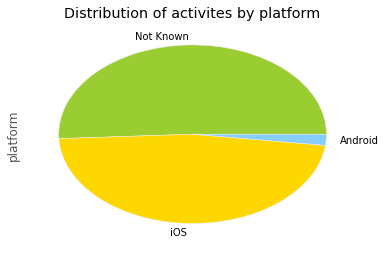

In [187]:
df['platform'].value_counts().plot(kind='pie',title='Distribution of activites by platform',colors=colors)
plt.show()

### Hence we know maximum of our traffic is through iOS apps or is not known. Android Play Store is where we have a large scope to increase our customer base

In [188]:
df['gamescore'] = df['gamescore'].replace('null','0')

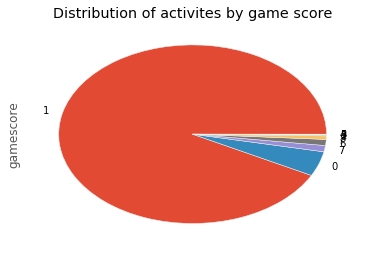

In [189]:
df['gamescore'].value_counts().plot(kind='pie',title='Distribution of activites by game score')
plt.show()

In [190]:
df['createdat'] = pd.to_datetime(df['createdat'])

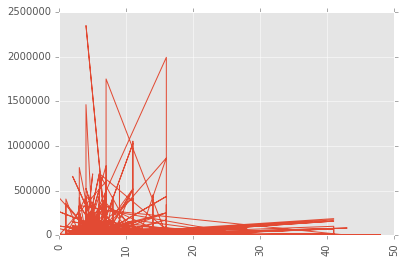

In [191]:
df = df.sort_values('createdat', ascending=True)
plt.plot(df['age'], df['duration'])
plt.xticks(rotation='vertical')
plt.show()

## Sum of total duration of children with different ages depicts that maximum duration if for the children of age 5-15

### Hence no data before 2016

In [ ]:
df['2016']

In [ ]:
df['2017']

### Hence we now know our maximum activity traffic is from the year 2017

In [44]:
s = pd.Series(df['createdat'], name='squares')
s

65541    2016-12-15 15:42:00
65543    2016-12-20 13:23:00
65545    2016-12-28 02:31:00
65546    2016-12-08 15:05:00
65550    2016-12-17 00:45:00
65551    2016-12-28 20:32:00
65552    2016-12-26 15:01:00
65554    2016-12-26 18:01:00
65556    2017-02-23 12:38:00
65557    2017-02-23 14:48:00
65559    2017-03-28 15:48:00
65561    2017-02-17 02:35:00
65563    2017-03-16 15:26:00
65565    2017-03-16 17:36:00
65566    2017-03-28 16:24:00
65567    2017-03-28 17:45:00
65568    2017-03-28 19:14:00
65569    2017-03-28 23:42:00
65570    2017-03-29 13:22:00
65571    2017-03-29 15:31:00
65572    2017-03-29 17:21:00
65573    2017-03-29 19:43:00
65574    2017-03-29 20:46:00
65575    2017-03-30 00:26:00
65576    2017-03-30 12:27:00
65577    2017-02-27 02:23:00
65579    2017-03-08 16:00:00
65583    2017-01-09 21:52:00
65586    2017-03-08 20:40:00
65587    2017-03-09 00:57:00
                 ...        
309522   2016-12-29 14:52:00
309526   2017-01-13 12:55:00
309540   2017-01-28 03:16:00
309542   2017-

In [45]:
s.values

array(['2016-12-15T15:42:00.000000000', '2016-12-20T13:23:00.000000000',
       '2016-12-28T02:31:00.000000000', ...,
       '2017-06-07T04:27:00.000000000', '2017-06-24T19:17:00.000000000',
       '2017-07-10T22:23:00.000000000'], dtype='datetime64[ns]')

In [41]:
s.index

Int64Index([ 65541,  65543,  65545,  65546,  65550,  65551,  65552,  65554,
             65556,  65557,
            ...
            309594, 309595, 309597, 309598, 309600, 309608, 309610, 309615,
            309619, 309621],
           dtype='int64', length=118275)

## Total activities per Game

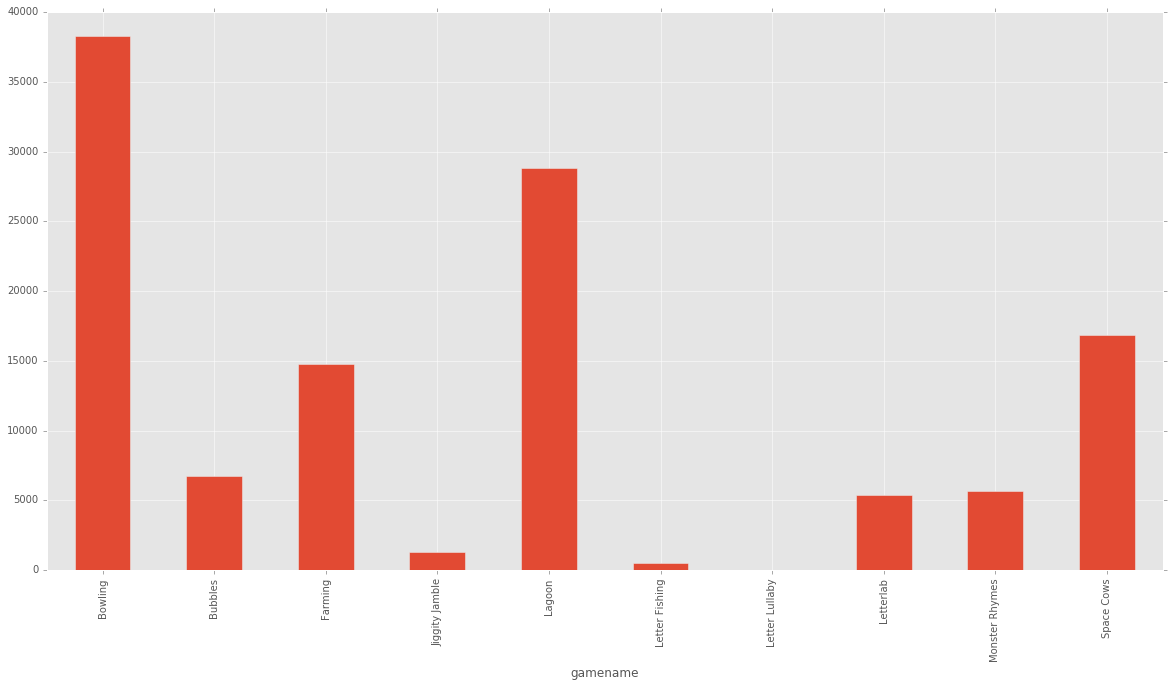

In [209]:
df.groupby(['gamename']).size().plot(kind='bar', figsize=(20,10))
plt.show()

## Total Activities by Age

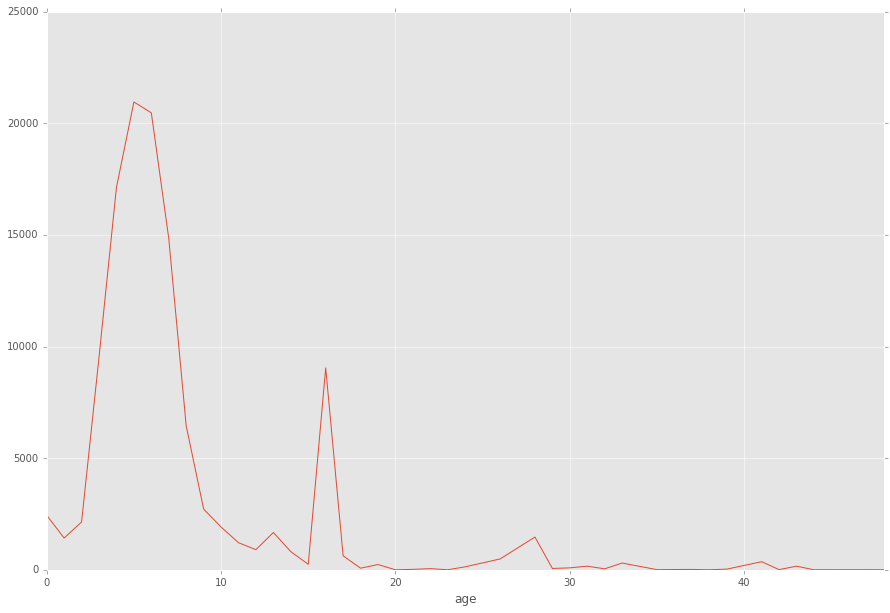

In [206]:
df.groupby(['age']).size().plot(kind='line',figsize=(15,10))
plt.show()

## Plots of duration for every child on the first day v/s last day

### To find if the engagement of a child increased with time

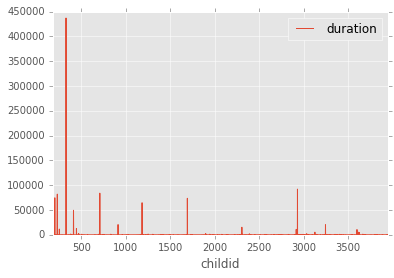

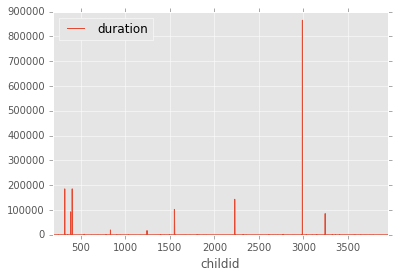

In [231]:
df_first = df.groupby(['childid'])['createdat','duration'].first()
df_last = df.groupby(['childid'])['createdat','duration'].last()
df_first.plot(kind='line')
df_last.plot(kind='line')
plt.show()

## Saving the clean anamolies free data to csv

In [232]:
df.to_csv('SquarePanda_DataQuest.csv', sep=',', encoding='utf-8')